In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, f, pearsonr, ttest_ind, t

In [46]:
atussum_2016 = pd.read_csv('atussum_2016.csv')
atussum_2017 = pd.read_csv('atussum_2017.csv')
atussum_2018 = pd.read_csv('atussum_2018.csv')
atussum_2019 = pd.read_csv('atussum_2019.csv')

df_list = [atussum_2016, atussum_2017, atussum_2018, atussum_2019]

combined_df = pd.concat(df_list, ignore_index=True)

print(combined_df.head())

print(combined_df.shape)

         TUCASEID     TUFINLWGT  TRYHHCHILD  TEAGE  TESEX  PEEDUCA  PTDTRACE  \
0  20160101160045  2.458865e+07          -1     62      2       39         1   
1  20160101160066  5.445941e+06          -1     69      1       37         2   
2  20160101160069  8.782622e+06           0     24      2       39         2   
3  20160101160083  3.035910e+06           8     31      2       40         1   
4  20160101160084  6.978586e+06          -1     59      2       39         1   

   PEHSPNON  GTMETSTA  TELFS  ...  t119999  t130115  t130123  t130399  \
0         2         1      5  ...      NaN      NaN      NaN      NaN   
1         2         2      5  ...      NaN      NaN      NaN      NaN   
2         2         1      5  ...      NaN      NaN      NaN      NaN   
3         2         2      1  ...      NaN      NaN      NaN      NaN   
4         2         1      1  ...      NaN      NaN      NaN      NaN   

   t130402  t150899  t019999  t060402  t090302  t180599  
0      NaN      NaN   

In [47]:
aantal_niet_negatief_1 = (combined_df['TRERNWA'] != -1).sum()

print(f"Aantal instances met een wekelijks inkomen: {aantal_niet_negatief_1}")

Aantal instances met een wekelijks inkomen: 21361


In [48]:
asum1 = combined_df[(combined_df['TRERNWA'] != -1)]
asum1.loc[:, 'TRERNWA'] = asum1['TRERNWA'] / 100
df = asum1.fillna(0)

def sum_columns_with_prefix(df, prefix):
    cols_to_sum = [col for col in df.columns if col.startswith(prefix)]
    if cols_to_sum:
        return df[cols_to_sum].sum(axis=1)
    else:
        return pd.Series([0] * len(df), index=df.index)

detailed_prefixes = ['t0101', 't0102', 't0103', 't0104', 't0199', 
                     't0201', 't0202', 't0203', 't0204', 't0205', 't0206', 't0207', 't0208', 't0209', 't0299', 
                     't0301', 't0302', 't0303', 't0304', 't0305', 't0399',
                     't0401', 't0402', 't0403', 't0404', 't0405', 't0499',
                     't0501', 't0502', 't0503', 't0504', 't0599', 
                     't0601', 't0602', 't0603', 't0604', 't0699', 
                     't0701', 't0702', 't0703', 't0799', 
                     't0801', 't0802', 't0803', 't0804', 't0805', 't0806', 't0807', 't0808', 't0899', 
                     't0901', 't0902', 't0903', 't0904', 't0905', 't0999',
                     't1001', 't1002', 't1003', 't1004', 't1099', 
                     't1101', 't1102', 't1199',
                     't1201', 't1202', 't1203', 't1204', 't1205', 't0299', 
                     't1301', 't1302', 't1303', 't1304', 't0399',
                     't1401', 't1499',
                     't1501', 't1502', 't1503', 't1504', 't1505', 't1506', 't1507', 't1508', 't0299',
                     't1601', 't1602', 't1699',
                     't1801', 't1802', 't1803', 't1804', 't1805', 't1806', 't1807', 't1808', 't1809', 't1810', 't1811', 't1812', 't1813', 't1814', 't1815', 't1816', 't1817', 't1818', 't1899']

general_prefixes = ['t01', 't02',  't03', 't04', 't05', 't06', 't07', 't08',  't09', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't18']

sum_columns_dict = {}

for prefix in detailed_prefixes:
    sum_columns_dict[f'{prefix}_sum'] = sum_columns_with_prefix(df, prefix)

for prefix in general_prefixes:
    sum_columns_dict[f'{prefix}_sum'] = sum_columns_with_prefix(df, prefix)

sum_df = pd.DataFrame(sum_columns_dict, index=df.index)

df = pd.concat([df, sum_df], axis=1)

asum1 = df
print(df.shape)
df.head()

(21361, 585)


TUCASEID     TUFINLWGT  TRYHHCHILD  TEAGE  TESEX  PEEDUCA  PTDTRACE  \
3   20160101160083  3.035910e+06           8     31      2       40         1   
4   20160101160084  6.978586e+06          -1     59      2       39         1   
10  20160101160546  3.165768e+06           1     35      1       43         1   
11  20160101160550  9.195339e+06           5     54      2       44         1   
12  20160101160560  2.847325e+06          -1     40      2       43         1   

    PEHSPNON  GTMETSTA  TELFS  ...  t08_sum  t09_sum  t10_sum  t11_sum  \
3          2         2      1  ...      0.0      0.0      0.0    165.0   
4          2         1      1  ...      0.0      0.0      0.0     30.0   
10         2         2      1  ...      0.0      0.0      0.0    120.0   
11         2         1      1  ...      0.0     15.0      0.0     75.0   
12         2         2      1  ...      0.0      0.0      0.0     45.0   

    t12_sum  t13_sum  t14_sum  t15_sum  t16_sum  t18_sum  
3     120.0      0.0        0      0.0       45      0.0  
4     177.0      0.0       60    130.0      120     75.0  
10     75.0      0.0        0      0.0        0      0.0  
11     65.0      0.0        0      0.0        0    190.0  
12    180.0      0.0        0      0.0        0    155.0  

[5 rows x 585 columns]

In [43]:
correlation_matrix = df.corr()

target_correlation = correlation_matrix['TRERNWA']

print(target_correlation.abs().sort_values(ascending=False)[:60])

TRERNWA       1.000000
PEEDUCA       0.444007
TRDPFTPT      0.410770
TEHRUSLT      0.364695
TESEX         0.218152
TRSPPRES      0.212455
TESPEMPNOT    0.202841
TESCHLVL      0.163835
PEHSPNON      0.143570
t01_sum       0.135128
TRSPFTPT      0.130947
GTMETSTA      0.123283
t0101_sum     0.117321
t010101       0.111918
t1101_sum     0.111125
t110101       0.111125
t11_sum       0.110967
t06_sum       0.106710
TUFINLWGT     0.105441
TEAGE         0.104685
t050101       0.099330
t1203_sum     0.097852
t0501_sum     0.092416
t18_sum       0.091243
t05_sum       0.090957
t060101       0.090151
t12_sum       0.089390
t0601_sum     0.088204
t13_sum       0.078085
t1301_sum     0.076816
t060301       0.076371
t1805_sum     0.074181
t180501       0.073727
t0603_sum     0.073537
t120303       0.072786
t1806_sum     0.071413
t0102_sum     0.071203
t010201       0.070754
t130124       0.065959
t0201_sum     0.063829
t0301_sum     0.062703
t120307       0.061852
TUCASEID      0.061523
t180601    

In [6]:
gemiddelde = asum1['TRERNWA'].mean()
mediaan = asum1['TRERNWA'].median()
standaard_dev = asum1['TRERNWA'].std()
min_waarde = asum1['TRERNWA'].min()
max_waarde = asum1['TRERNWA'].max()
kwartiel_1 = asum1['TRERNWA'].quantile(0.25)
kwartiel_3 = asum1['TRERNWA'].quantile(0.75)

print(f"Gemiddelde: {gemiddelde}")
print(f"Mediaan: {mediaan}")
print(f"Standaarddeviatie: {standaard_dev}")
print(f"Minimale waarde: {min_waarde}")
print(f"Maximale waarde: {max_waarde}")
print(f"25e percentiel (Q1): {kwartiel_1}")
print(f"75e percentiel (Q3): {kwartiel_3}")

Gemiddelde: 1053.1368114788634
Mediaan: 865.38
Standaarddeviatie: 742.2715093835026
Minimale waarde: 0.0
Maximale waarde: 2884.61
25e percentiel (Q1): 500.0
75e percentiel (Q3): 1442.3


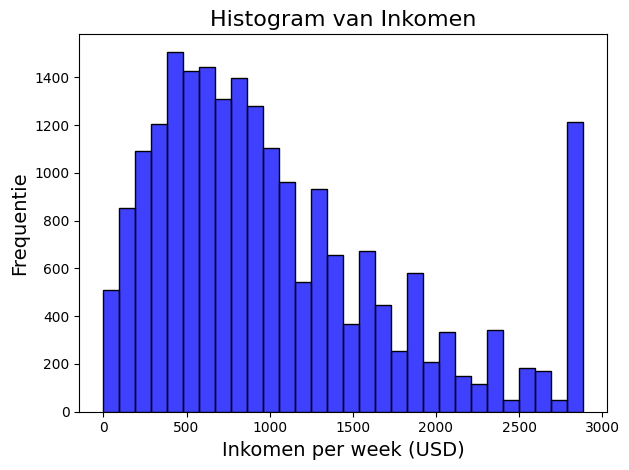

In [14]:
sns.histplot(df['TRERNWA'], bins=30, kde=False, color='blue', edgecolor='black')

plt.title('Histogram van Inkomen', fontsize=16)
plt.xlabel('Inkomen per week (USD)', fontsize=14)
plt.ylabel('Frequentie', fontsize=14)
plt.tight_layout()

plt.show()

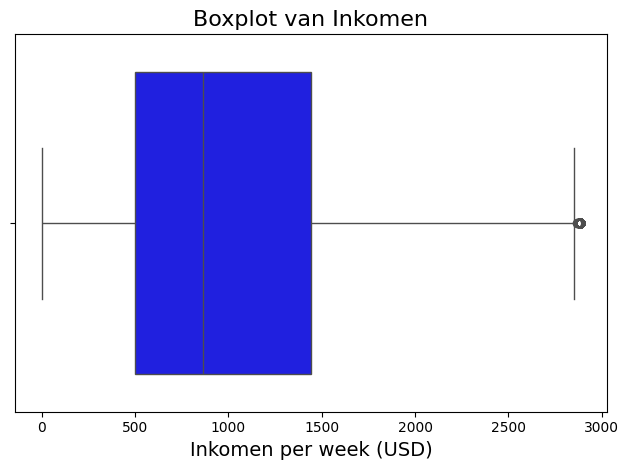

In [15]:
sns.boxplot(x=df['TRERNWA'], color='blue')

plt.title('Boxplot van Inkomen', fontsize=16)
plt.xlabel('Inkomen per week (USD)', fontsize=14)

plt.tight_layout()

plt.show()

In [16]:
totaal_aantal = df.shape[0]

aantal_lager_dan_100 = (df['TRERNWA'] < 100).sum()

aantal_hoger_dan_2884_84 = (df['TRERNWA'] > 2884.6).sum()

print('Totaal aantal: ', totaal_aantal)
print('Aantal met lager inkomen dan $100: ', aantal_lager_dan_100)
print('Aantal met inkomen hoger dan $2884.61: ', aantal_hoger_dan_2884_84)

Totaal aantal:  21361
Aantal met lager inkomen dan $100:  521
Aantal met inkomen hoger dan $2884.61:  1128


## Opleidingsniveau

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/925155795.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=opleidingsniveaus_counts.values, palette='viridis')


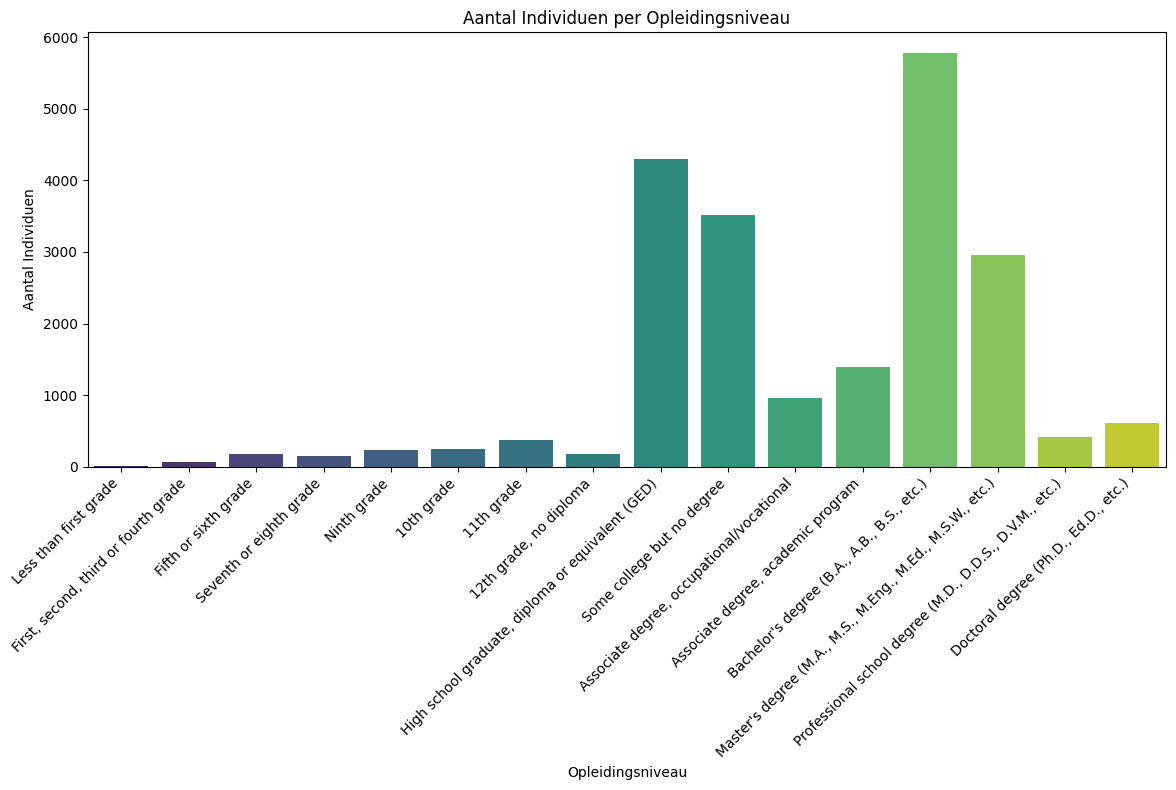

In [7]:
opleidingsniveaus = {
    31: 'Less than first grade',
    32: 'First, second, third or fourth grade',
    33: 'Fifth or sixth grade',
    34: 'Seventh or eighth grade',
    35: 'Ninth grade',
    36: '10th grade',
    37: '11th grade',
    38: '12th grade, no diploma',
    39: 'High school graduate, diploma or equivalent (GED)',
    40: 'Some college but no degree',
    41: 'Associate degree, occupational/vocational',
    42: 'Associate degree, academic program',
    43: 'Bachelor\'s degree (B.A., A.B., B.S., etc.)',
    44: 'Master\'s degree (M.A., M.S., M.Eng., M.Ed., M.S.W., etc.)',
    45: 'Professional school degree (M.D., D.D.S., D.V.M., etc.)',
    46: 'Doctoral degree (Ph.D., Ed.D., etc.)'
}

opleidingsniveaus_counts = asum1['PEEDUCA'].value_counts().sort_index()

labels = [opleidingsniveaus[code] for code in opleidingsniveaus_counts.index]

plt.figure(figsize=(12, 8))
sns.barplot(x=labels, y=opleidingsniveaus_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Aantal Individuen per Opleidingsniveau')
plt.xlabel('Opleidingsniveau')
plt.ylabel('Aantal Individuen')

plt.tight_layout()  
plt.show()

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/390776836.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Opleidingsniveau', y='TRERNWA', data=asum1, palette='viridis')


Text(0, 0.5, 'Inkomen per week (USD)')

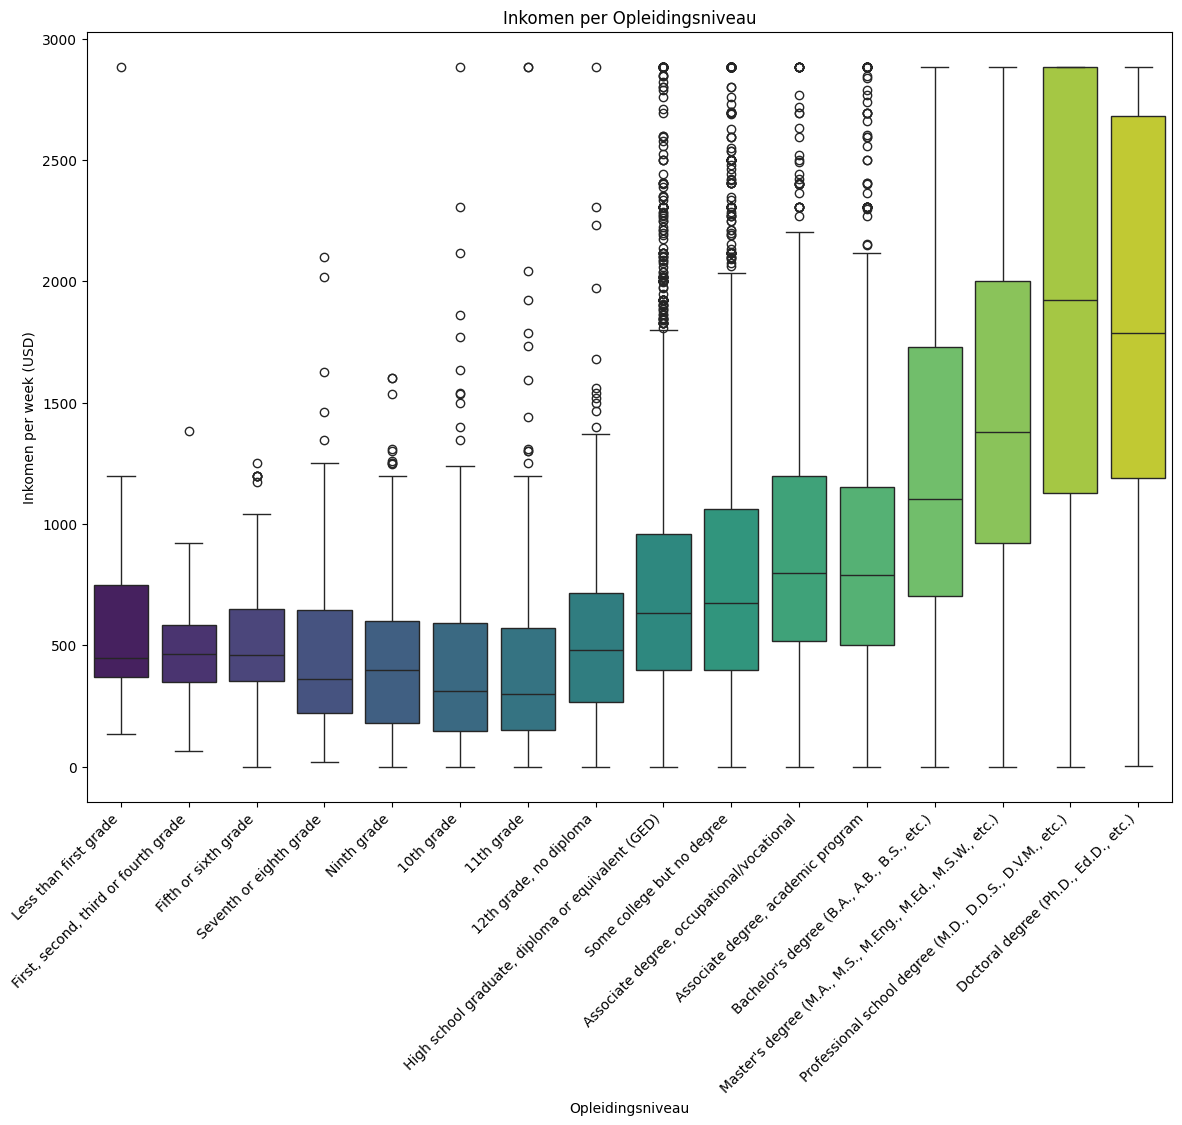

In [8]:
asum1.loc[:, 'Opleidingsniveau'] = asum1['PEEDUCA'].map(opleidingsniveaus)

asum1['Opleidingsniveau'] = pd.Categorical(
    asum1['Opleidingsniveau'],
    categories=[
        'Less than first grade', 'First, second, third or fourth grade', 'Fifth or sixth grade', 'Seventh or eighth grade', 'Ninth grade',
        '10th grade', '11th grade', '12th grade, no diploma', 'High school graduate, diploma or equivalent (GED)', 'Some college but no degree',
        'Associate degree, occupational/vocational', 'Associate degree, academic program', 'Bachelor\'s degree (B.A., A.B., B.S., etc.)',
        'Master\'s degree (M.A., M.S., M.Eng., M.Ed., M.S.W., etc.)', 'Professional school degree (M.D., D.D.S., D.V.M., etc.)',
        'Doctoral degree (Ph.D., Ed.D., etc.)'
    ],
    ordered=True
)

plt.figure(figsize=(14, 10))
sns.boxplot(x='Opleidingsniveau', y='TRERNWA', data=asum1, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Inkomen per Opleidingsniveau')
plt.xlabel('Opleidingsniveau')
plt.ylabel('Inkomen per week (USD)')

In [12]:
correlation, p_value = pearsonr(asum1['PEEDUCA'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

groepen = [asum1[asum1['PEEDUCA'] == code]['TRERNWA'] for code in opleidingsniveaus.keys()]

groepen = [groep for groep in groepen if not groep.empty]

# ANOVA-test
f_stat, p_val = f_oneway(*groepen)
print(f'F Waarde: {f_stat:.6f}')

if p_val < 0.001:
    print('Precise p-value: <0.001')
elif p_val < 0.01:
    print('Precise p-value: <0.01')
elif p_val < 0.05:
    print('Precise p-value: <0.05')
elif p_val < 0.1:
    print('Precise p-value: <0.1')
else:
    print(f'Precise p-value: {p_val:.10e}')

if p_val < 0.05:
    print("Er is een statistisch significant verschil in inkomen tussen de verschillende opleidingsniveaus.")
else:
    print("Er is geen statistisch significant verschil in inkomen tussen de verschillende opleidingsniveaus.")

Pearson correlatiecoëfficiënt: 0.444007
P-waarde: 0.000000
________

F Waarde: 410.456230
Precise p-value: <0.001
Er is een statistisch significant verschil in inkomen tussen de verschillende opleidingsniveaus.


## Employment status (full-time vs part-time)

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/1055578987.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Werkstatus', y='TRERNWA', data=asum1, palette='viridis')


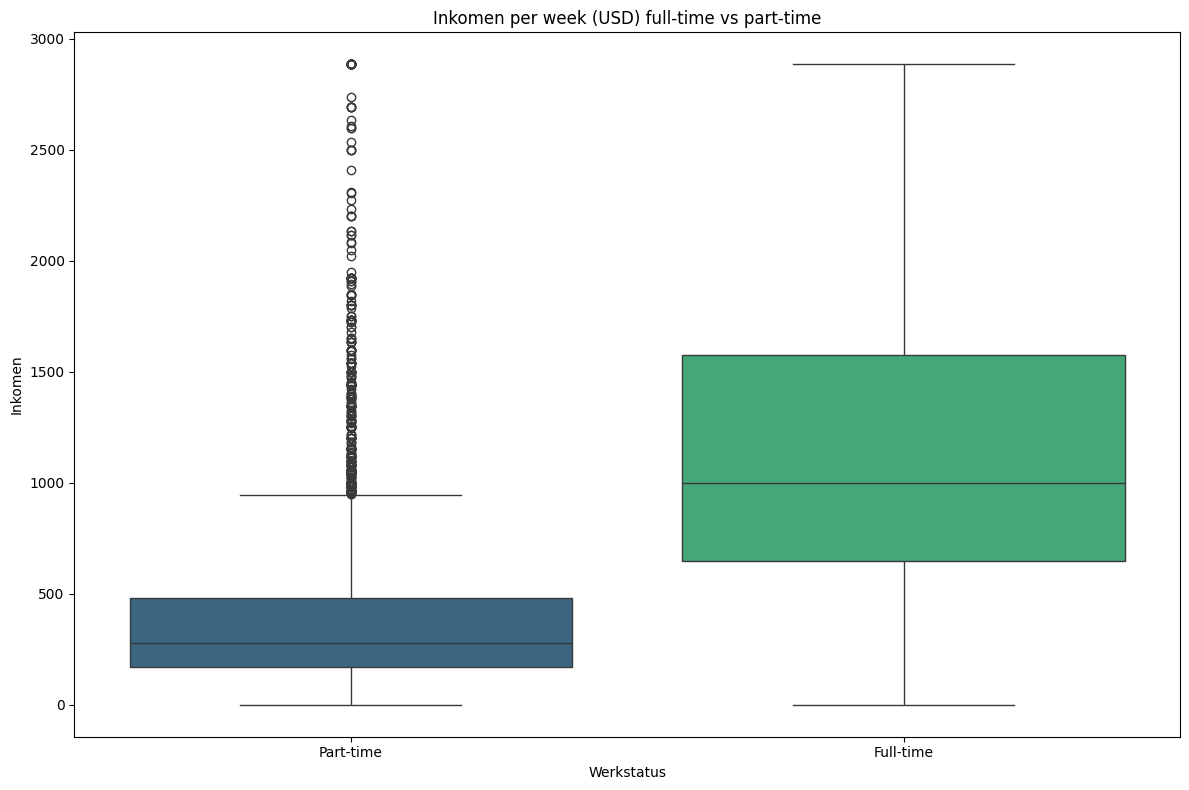

In [13]:
employment_status = {
    1: 'Full-time',
    2: 'Part-time'
}

asum1.loc[:, 'Werkstatus'] = asum1['TRDPFTPT'].map(employment_status)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Werkstatus', y='TRERNWA', data=asum1, palette='viridis')
plt.title('Inkomen per week (USD) full-time vs part-time')
plt.xlabel('Werkstatus')
plt.ylabel('Inkomen')

plt.tight_layout()  
plt.show()

In [20]:
asum1['TRDPFTPT'] = asum1['TRDPFTPT'].replace(2, 0)
correlation, p_value = pearsonr(asum1['TRDPFTPT'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

fulltime_wages = asum1[asum1['TRDPFTPT'] == 1]['TRERNWA']
parttime_wages = asum1[asum1['TRDPFTPT'] == 0]['TRERNWA']

# T-test
t_stat, p_val = ttest_ind(fulltime_wages, parttime_wages)

print(f't-statistic: {t_stat:.10f}')

if p_val < 0.001:
    print('Precise p-value: <0.001')
elif p_val < 0.01:
    print('Precise p-value: <0.01')
elif p_val < 0.05:
    print('Precise p-value: <0.05')
elif p_val < 0.1:
    print('Precise p-value: <0.1')
else:
    print(f'Precise p-value: {p_val:.10e}')

if p_val < 0.05:
    print("Er is een statistisch significant verschil in inkomen tussen full-time en part-time werknemers.")
else:
    print("Er is geen statistisch significant verschil in inkomen tussen full-time en part-time werknemers.")

Pearson correlatiecoëfficiënt: 0.410770
P-waarde: 0.000000
________

t-statistic: 65.8443538987
Precise p-value: <0.001
Er is een statistisch significant verschil in inkomen tussen full-time en part-time werknemers.


## Uren gewerkt

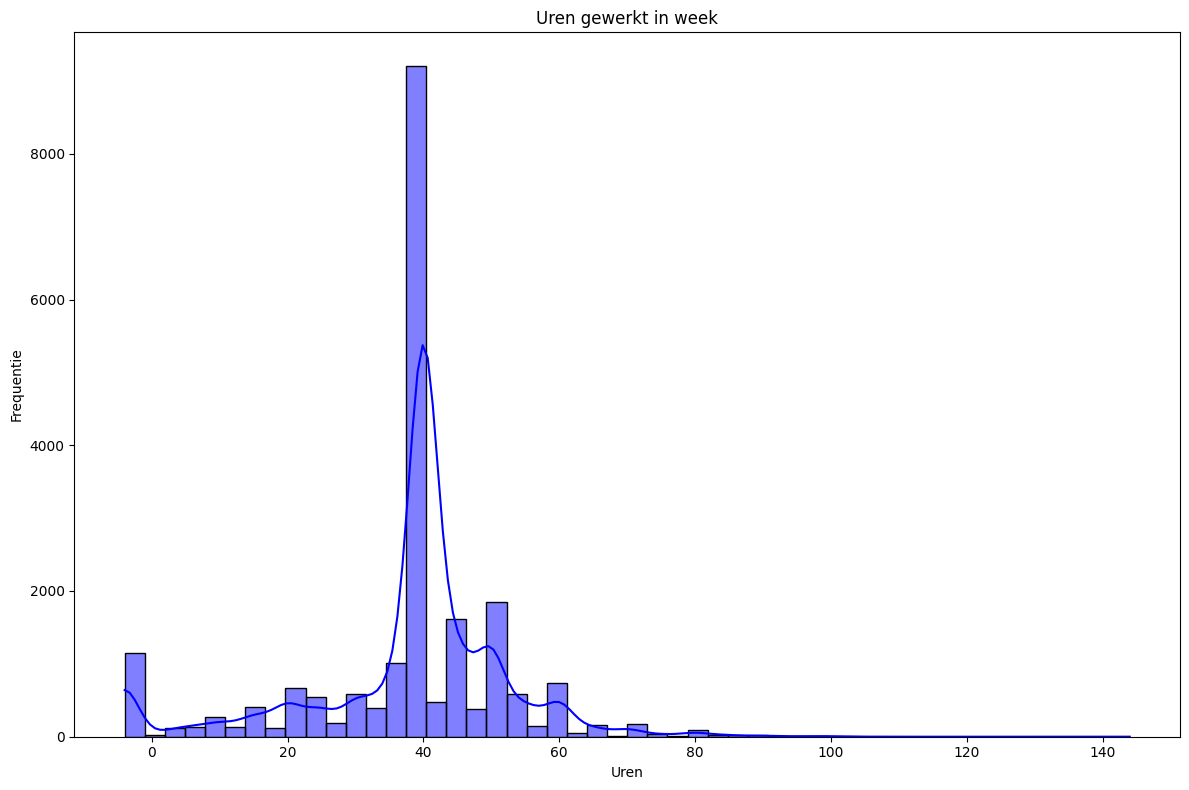

In [91]:
plt.figure(figsize=(12, 8))
sns.histplot(asum1['TEHRUSLT'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Uren gewerkt in week')
plt.xlabel('Uren')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()

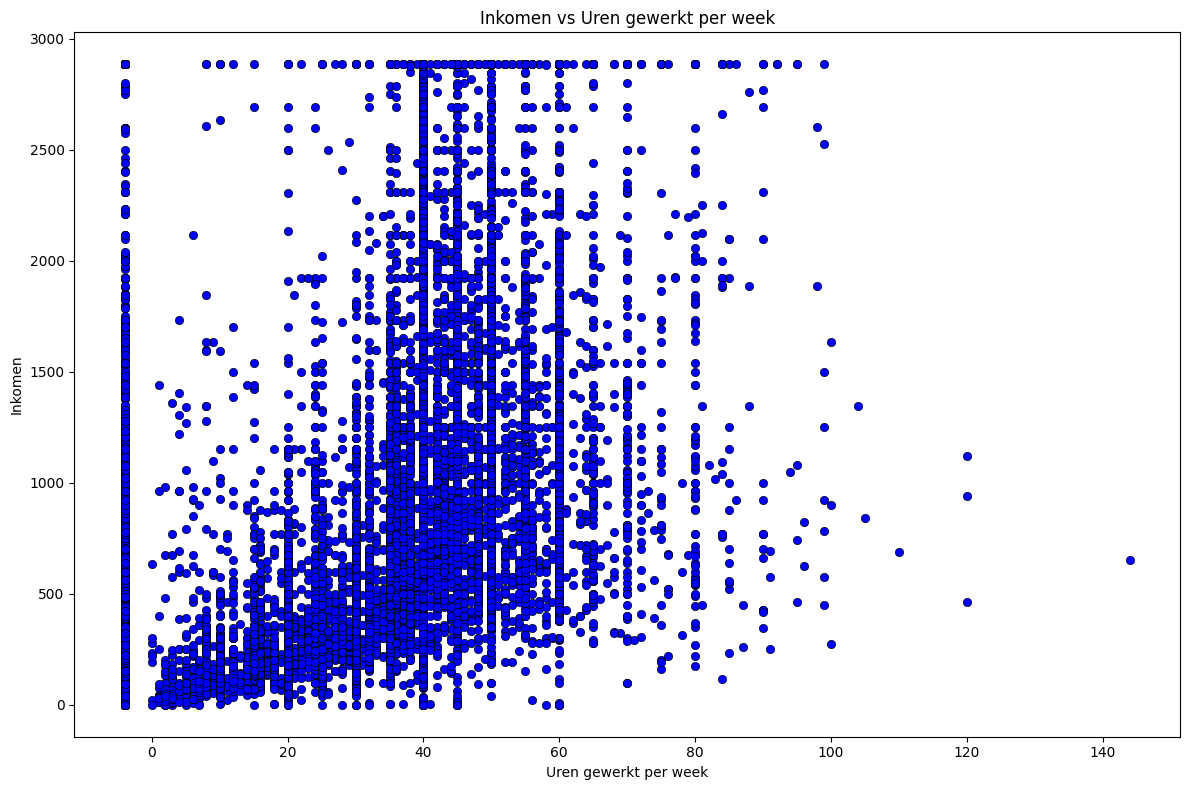

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TEHRUSLT', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Uren gewerkt per week')
plt.xlabel('Uren gewerkt per week')
plt.ylabel('Inkomen')

plt.tight_layout()
plt.show()

In [16]:
correlation, p_value = pearsonr(asum1['TEHRUSLT'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen het aantal uren gewerkt per week en het inkomen.")
else:
    print("Er is geen statistisch significant verband tussen het aantal uren gewerkt per week en het inkomen.")

Pearson correlatiecoëfficiënt: 0.364695
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen het aantal uren gewerkt per week en het inkomen.


## Geslacht

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/4266539513.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Geslacht', y='TRERNWA', data=asum1, palette='viridis')


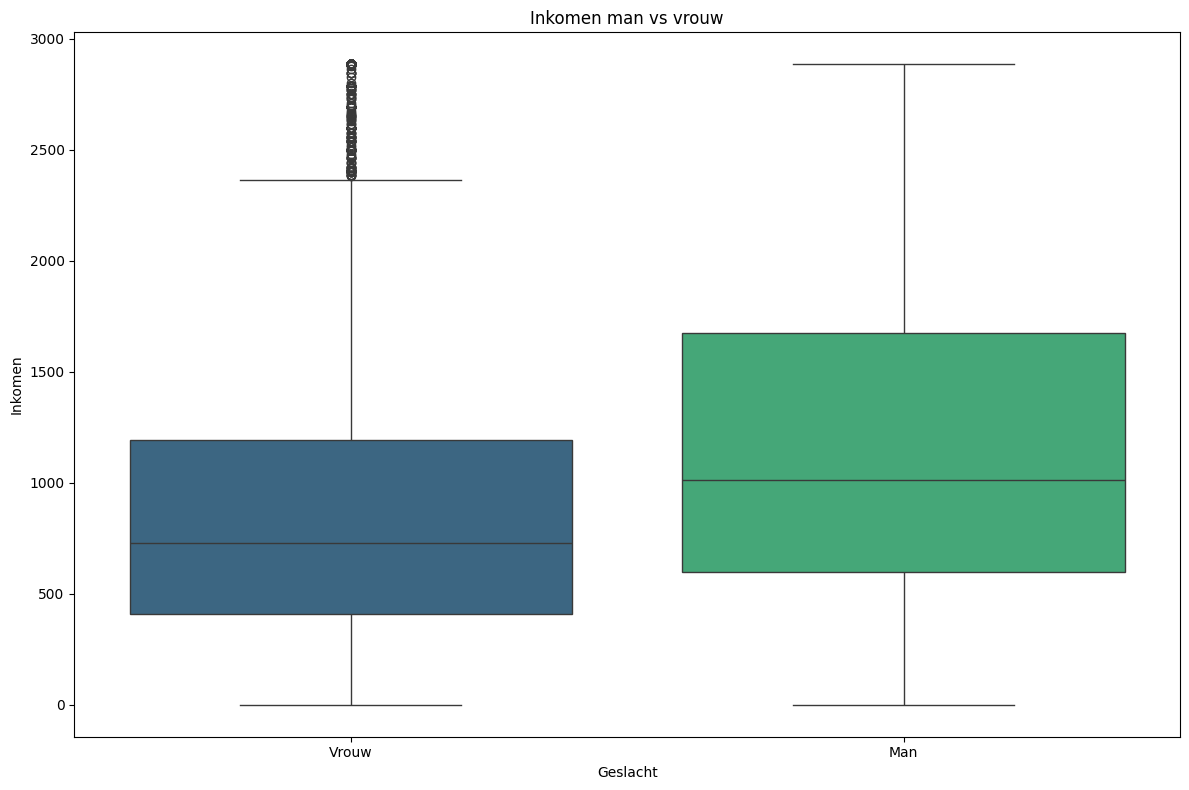

In [23]:
asum1['TESEX'] = asum1['TESEX'].replace(2, 0)
gender = {
    1: 'Man',
    0: 'Vrouw'
}

asum1.loc[:, 'Geslacht'] = asum1['TESEX'].map(gender)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Geslacht', y='TRERNWA', data=asum1, palette='viridis')
plt.title('Inkomen man vs vrouw')
plt.xlabel('Geslacht')
plt.ylabel('Inkomen')

plt.tight_layout() 
plt.show()

In [24]:
correlation, p_value = pearsonr(asum1['TESEX'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

male_wages = asum1[asum1['TESEX'] == 1]['TRERNWA']
female_wages = asum1[asum1['TESEX'] == 0]['TRERNWA']

# T-test
t_stat, p_val = ttest_ind(male_wages, female_wages)


print(f't-statistic: {t_stat:.10f}')

if p_val < 0.001:
    print('Precise p-value: <0.001')
elif p_val < 0.01:
    print('Precise p-value: <0.01')
elif p_val < 0.05:
    print('Precise p-value: <0.05')
elif p_val < 0.1:
    print('Precise p-value: <0.1')
else:
    print(f'Precise p-value: {p_val:.10e}')

if p_val < 0.05:
    print("Er is een statistisch significant verschil in inkomen tussen mannen en vrouwen.")
else:
    print("Er is geen statistisch significant verschil in inkomen tussen mannen en vrouwen.")

Pearson correlatiecoëfficiënt: 0.218152
P-waarde: 0.000000
________

t-statistic: 32.6691585695
Precise p-value: <0.001
Er is een statistisch significant verschil in inkomen tussen mannen en vrouwen.


## Partner

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/1407844661.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Partner Aanwezigheid', y='TRERNWA', data=asum1, palette='viridis', ax=axes[0])
/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/1407844661.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Partner Werkstatus', y='TRERNWA', data=asum1, palette='viridis', ax=axes[1])
/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/1407844661.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplo

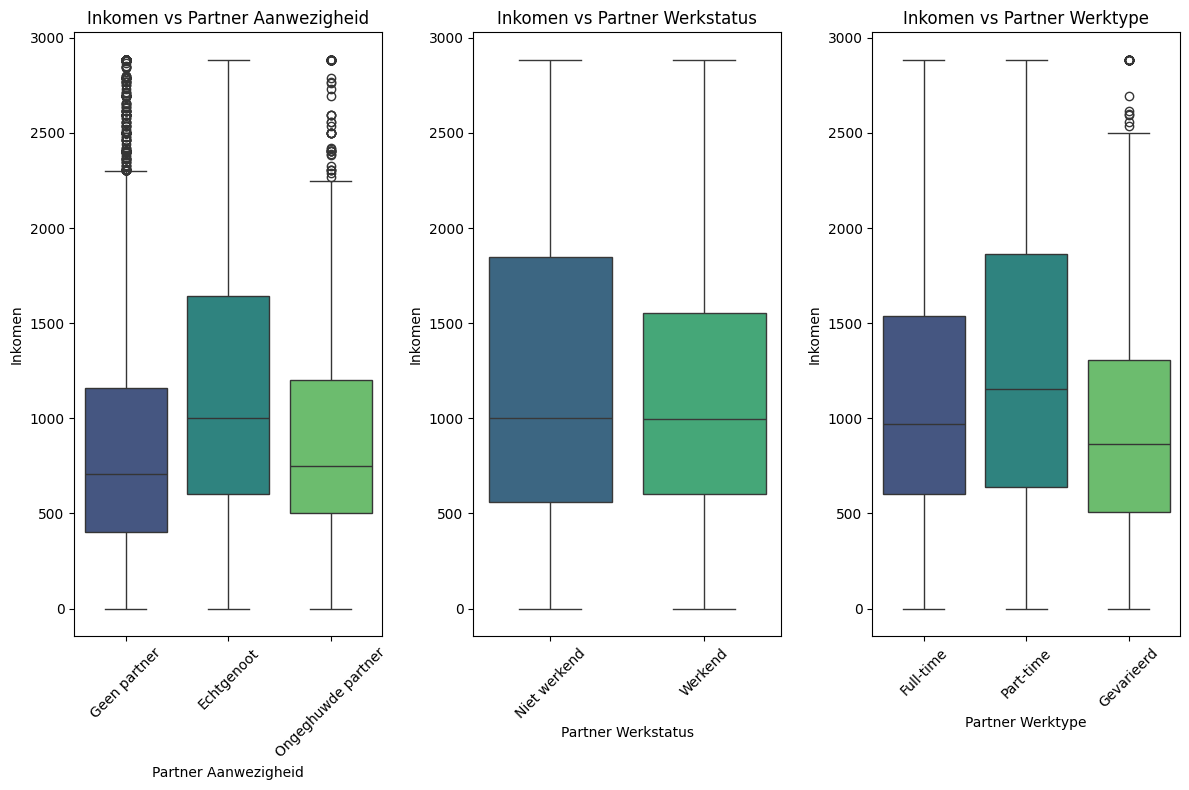

In [25]:
partner_presence = {1: 'Echtgenoot', 2: 'Ongeghuwde partner', 3: 'Geen partner'}
partner_employment_status = {1: 'Werkend', 2: 'Niet werkend'}
partner_employment_type = {1: 'Full-time', 2: 'Part-time', 3: 'Gevarieerd'}

asum1.loc[:, 'Partner Aanwezigheid'] = asum1['TRSPPRES'].map(partner_presence)
asum1.loc[:, 'Partner Werkstatus'] = asum1['TESPEMPNOT'].map(partner_employment_status)
asum1.loc[:, 'Partner Werktype'] = asum1['TRSPFTPT'].map(partner_employment_type)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

sns.boxplot(x='Partner Aanwezigheid', y='TRERNWA', data=asum1, palette='viridis', ax=axes[0])
axes[0].set_title('Inkomen vs Partner Aanwezigheid')
axes[0].set_xlabel('Partner Aanwezigheid')
axes[0].set_ylabel('Inkomen')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Partner Werkstatus', y='TRERNWA', data=asum1, palette='viridis', ax=axes[1])
axes[1].set_title('Inkomen vs Partner Werkstatus')
axes[1].set_xlabel('Partner Werkstatus')
axes[1].set_ylabel('Inkomen')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Partner Werktype', y='TRERNWA', data=asum1, palette='viridis', ax=axes[2])
axes[2].set_title('Inkomen vs Partner Werktype')
axes[2].set_xlabel('Partner Werktype')
axes[2].set_ylabel('Inkomen')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [31]:
def print_p_value(p_val):
    if p_val < 0.001:
        return '<0.001'
    elif p_val < 0.01:
        return '<0.01'
    elif p_val < 0.05:
        return '<0.05'
    elif p_val < 0.1:
        return '<0.1'
    else:
        return f'{p_val:.10e}'

def precise_p_value(t_stat, n1, n2):
    df = n1 + n2 - 2
    p_val_precies = 1 - t.cdf(t_stat, df)
    return p_val_precies

# Partner Aanwezigheid 
echtgenoot_wages = asum1[asum1['TRSPPRES'] == 1]['TRERNWA']
ongehuwde_partner_wages = asum1[asum1['TRSPPRES'] == 2]['TRERNWA']
geen_partner_wages = asum1[asum1['TRSPPRES'] == 3]['TRERNWA']

# T-test tussen echtgenoot en ongehuwde partner
t_stat_echtgenoot_ongehuwde, p_val_echtgenoot_ongehuwde = ttest_ind(echtgenoot_wages, ongehuwde_partner_wages)
# T-test tussen echtgenoot en geen partner
t_stat_echtgenoot_geen, p_val_echtgenoot_geen = ttest_ind(echtgenoot_wages, geen_partner_wages)
# T-test tussen ongehuwde partner en geen partner
t_stat_ongehuwde_geen, p_val_ongehuwde_geen = ttest_ind(ongehuwde_partner_wages, geen_partner_wages)

p_val_precies_echtgenoot_ongehuwde = precise_p_value(t_stat_echtgenoot_ongehuwde, len(echtgenoot_wages), len(ongehuwde_partner_wages))
p_val_precies_echtgenoot_geen = precise_p_value(t_stat_echtgenoot_geen, len(echtgenoot_wages), len(geen_partner_wages))
p_val_precies_ongehuwde_geen = precise_p_value(t_stat_ongehuwde_geen, len(ongehuwde_partner_wages), len(geen_partner_wages))

print(f'Partner Aanwezigheid (Echtgenoot vs Ongehuwde partner) t-statistic: {t_stat_echtgenoot_ongehuwde:.10f}')
print(f'Precise p-value: {print_p_value(p_val_precies_echtgenoot_ongehuwde)}')
print(f'Partner Aanwezigheid (Echtgenoot vs Geen partner) t-statistic: {t_stat_echtgenoot_geen:.10f}')
print(f'Precise p-value: {print_p_value(p_val_precies_echtgenoot_geen)}')
print(f'Partner Aanwezigheid (Ongehuwde partner vs Geen partner) t-statistic: {t_stat_ongehuwde_geen:.10f}')

print(f'Precise p-value: {print_p_value(p_val_precies_ongehuwde_geen)}')
correlation, p_value = pearsonr(asum1['TRSPPRES'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

# Partner Werkstatus t-test
werkend_partner_wages = asum1[asum1['TESPEMPNOT'] == 1]['TRERNWA']
niet_werkend_partner_wages = asum1[asum1['TESPEMPNOT'] == 2]['TRERNWA']
t_stat_werkstatus, p_val_werkstatus = ttest_ind(werkend_partner_wages, niet_werkend_partner_wages)

p_val_precies_werkstatus = precise_p_value(t_stat_werkstatus, len(werkend_partner_wages), len(niet_werkend_partner_wages))

print(f'Partner Werkstatus t-statistic: {t_stat_werkstatus:.10f}')
print(f'Precise p-value: {print_p_value(p_val_precies_werkstatus)}')

correlation, p_value = pearsonr(asum1['TESPEMPNOT'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

# Partner Werktype t-test
fulltime_partner_wages = asum1[asum1['TRSPFTPT'] == 1]['TRERNWA']
parttime_partner_wages = asum1[asum1['TRSPFTPT'] == 2]['TRERNWA']
gevarieerd_partner_wages = asum1[asum1['TRSPFTPT'] == 3]['TRERNWA']

# T-test tussen full-time en part-time partner
t_stat_fulltime_parttime, p_val_fulltime_parttime = ttest_ind(fulltime_partner_wages, parttime_partner_wages)
# T-test tussen full-time en gevarieerd partner
t_stat_fulltime_gevarieerd, p_val_fulltime_gevarieerd = ttest_ind(fulltime_partner_wages, gevarieerd_partner_wages)
# T-test tussen part-time en gevarieerd partner
t_stat_parttime_gevarieerd, p_val_parttime_gevarieerd = ttest_ind(parttime_partner_wages, gevarieerd_partner_wages)

p_val_precies_fulltime_parttime = precise_p_value(t_stat_fulltime_parttime, len(fulltime_partner_wages), len(parttime_partner_wages))
p_val_precies_fulltime_gevarieerd = precise_p_value(t_stat_fulltime_gevarieerd, len(fulltime_partner_wages), len(gevarieerd_partner_wages))
p_val_precies_parttime_gevarieerd = precise_p_value(t_stat_parttime_gevarieerd, len(parttime_partner_wages), len(gevarieerd_partner_wages))

print(f'Partner Werktype (Full-time vs Part-time) t-statistic: {t_stat_fulltime_parttime:.10f}')
print(f'Precise p-value: {print_p_value(p_val_precies_fulltime_parttime)}')
print(f'Partner Werktype (Full-time vs Gevarieerd) t-statistic: {t_stat_fulltime_gevarieerd:.10f}')
print(f'Precise p-value: {print_p_value(p_val_precies_fulltime_gevarieerd)}')
print(f'Partner Werktype (Part-time vs Gevarieerd) t-statistic: {t_stat_parttime_gevarieerd:.10f}')
print(f'Precise p-value: {print_p_value(p_val_precies_parttime_gevarieerd)}')

correlation, p_value = pearsonr(asum1['TRSPFTPT'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

Partner Aanwezigheid (Echtgenoot vs Ongehuwde partner) t-statistic: 10.7582978288
Precise p-value: <0.001
Partner Aanwezigheid (Echtgenoot vs Geen partner) t-statistic: 31.5434356425
Precise p-value: <0.001
Partner Aanwezigheid (Ongehuwde partner vs Geen partner) t-statistic: 2.8082367818
Precise p-value: <0.01
Pearson correlatiecoëfficiënt: -0.212455
P-waarde: 0.000000
________

Partner Werkstatus t-statistic: -5.1203076771
Precise p-value: 9.9999984516e-01
Pearson correlatiecoëfficiënt: 0.202841
P-waarde: 0.000000
________

Partner Werktype (Full-time vs Part-time) t-statistic: -7.6751707883
Precise p-value: 1.0000000000e+00
Partner Werktype (Full-time vs Gevarieerd) t-statistic: 2.6076017379
Precise p-value: <0.01
Partner Werktype (Part-time vs Gevarieerd) t-statistic: 5.5705520523
Precise p-value: <0.001
Pearson correlatiecoëfficiënt: 0.130947
P-waarde: 0.000000
________



## Hispanic

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/1771447252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hispanic Status', y='TRERNWA', data=asum1, palette='viridis')


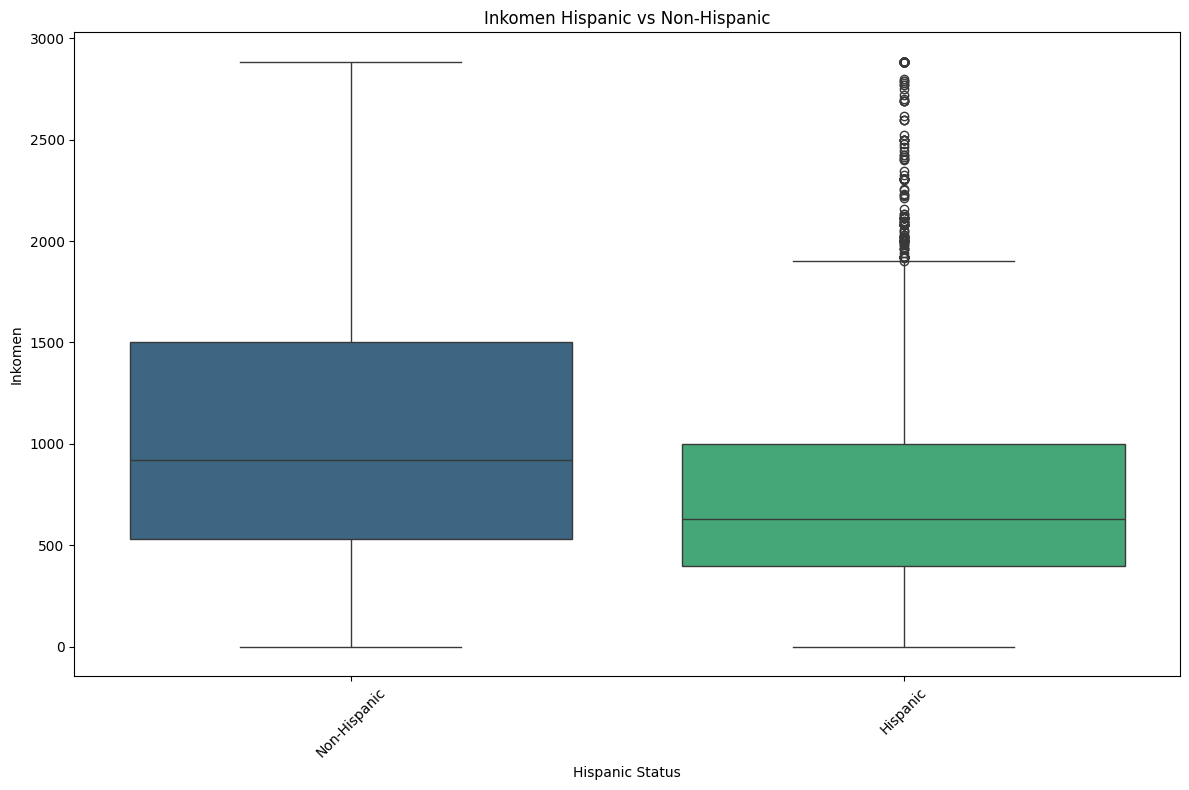

In [32]:
hispanic_status = {
    1: 'Hispanic',
    2: 'Non-Hispanic'
}

asum1.loc[:, 'Hispanic Status'] = asum1['PEHSPNON'].map(hispanic_status)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Hispanic Status', y='TRERNWA', data=asum1, palette='viridis')
plt.title('Inkomen Hispanic vs Non-Hispanic')
plt.xlabel('Hispanic Status')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [35]:
correlation, p_value = pearsonr(asum1['PEHSPNON'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

hispanic_wages = asum1[asum1['PEHSPNON'] == 1]['TRERNWA']
non_hispanic_wages = asum1[asum1['PEHSPNON'] == 2]['TRERNWA']

# T-test
t_stat, p_val = ttest_ind(hispanic_wages, non_hispanic_wages)

print(f't-statistic: {t_stat:.10f}')
print(f'P-waarde: {p_val:.10e}')

# P-waarde interpretatie
def print_p_value(p_val):
    if p_val < 0.001:
        return '<0.001'
    elif p_val < 0.01:
        return '<0.01'
    elif p_val < 0.05:
        return '<0.05'
    elif p_val < 0.1:
        return '<0.1'
    else:
        return f'{p_val:.10e}'

print(f'Precise p-value: {print_p_value(p_val)}')

if p_val < 0.05:
    print("Er is een statistisch significant verschil in inkomen tussen Hispanic en Non-Hispanic.")
else:
    print("Er is geen statistisch significant verschil in inkomen tussen Hispanic en Non-Hispanic.")

Pearson correlatiecoëfficiënt: 0.143570
P-waarde: 0.000000
________

t-statistic: -21.2020555344
P-waarde: 9.5180634083e-99
Precise p-value: <0.001
Er is een statistisch significant verschil in inkomen tussen Hispanic en Non-Hispanic.


## Metropolitan

/var/folders/wq/9k50k0z17hj5h7vgt_4rdbwh0000gn/T/ipykernel_82983/3798341497.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metropolitan Status', y='TRERNWA', data=asum1, palette='viridis')


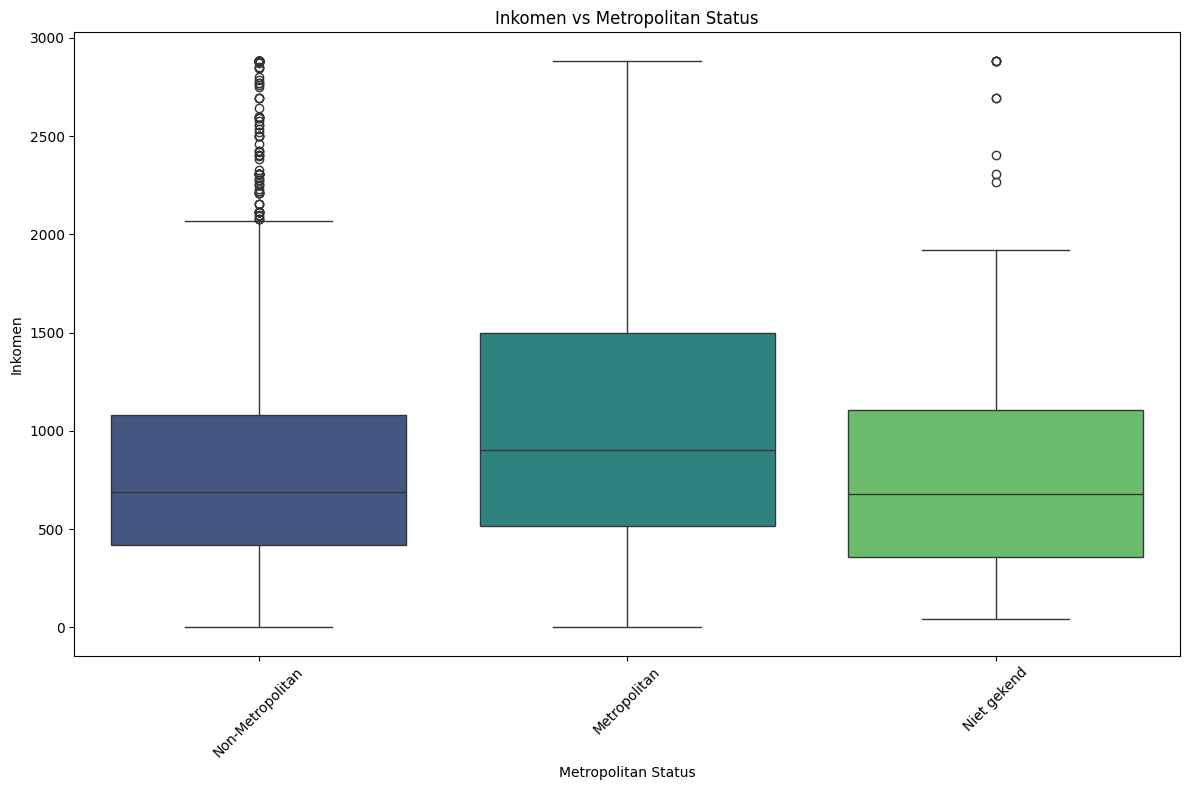

In [49]:
metropolitan_status = {
    1: 'Metropolitan',
    2: 'Non-Metropolitan',
    3: 'Niet gekend'
}

asum1.loc[:, 'Metropolitan Status'] = asum1['GTMETSTA'].map(metropolitan_status)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Metropolitan Status', y='TRERNWA', data=asum1, palette='viridis')
plt.title('Inkomen vs Metropolitan Status')
plt.xlabel('Metropolitan Status')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

In [51]:
correlation, p_value = pearsonr(asum1['GTMETSTA'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}\n________\n')

metropolitan_wages = asum1[asum1['GTMETSTA'] == 1]['TRERNWA']
non_metropolitan_wages = asum1[asum1['GTMETSTA'] == 2]['TRERNWA']
niet_gekend_wages = asum1[asum1['GTMETSTA'] == 3]['TRERNWA']

# ANOVA-test
f_stat, p_val = f_oneway(metropolitan_wages, non_metropolitan_wages, niet_gekend_wages)

print(f'F-statistic: {f_stat:.10f}')

if p_val < 0.001:
    print('Precise p-value: <0.001')
elif p_val < 0.01:
    print('Precise p-value: <0.01')
elif p_val < 0.05:
    print('Precise p-value: <0.05')
elif p_val < 0.1:
    print('Precise p-value: <0.1')
else:
    print(f'Precise p-value: {p_val:.10e}')

if p_val < 0.05:
    print("Er is een statistisch significant verschil in inkomen tussen de verschillende Metropolitan Status groepen.")
else:
    print("Er is geen statistisch significant verschil in inkomen tussen de verschillende Metropolitan Status groepen.")

Pearson correlatiecoëfficiënt: -0.123283
P-waarde: 0.000000
________

F-statistic: 172.9695066275
Precise p-value: <0.001
Er is een statistisch significant verschil in inkomen tussen de verschillende Metropolitan Status groepen.


## Leeftijd

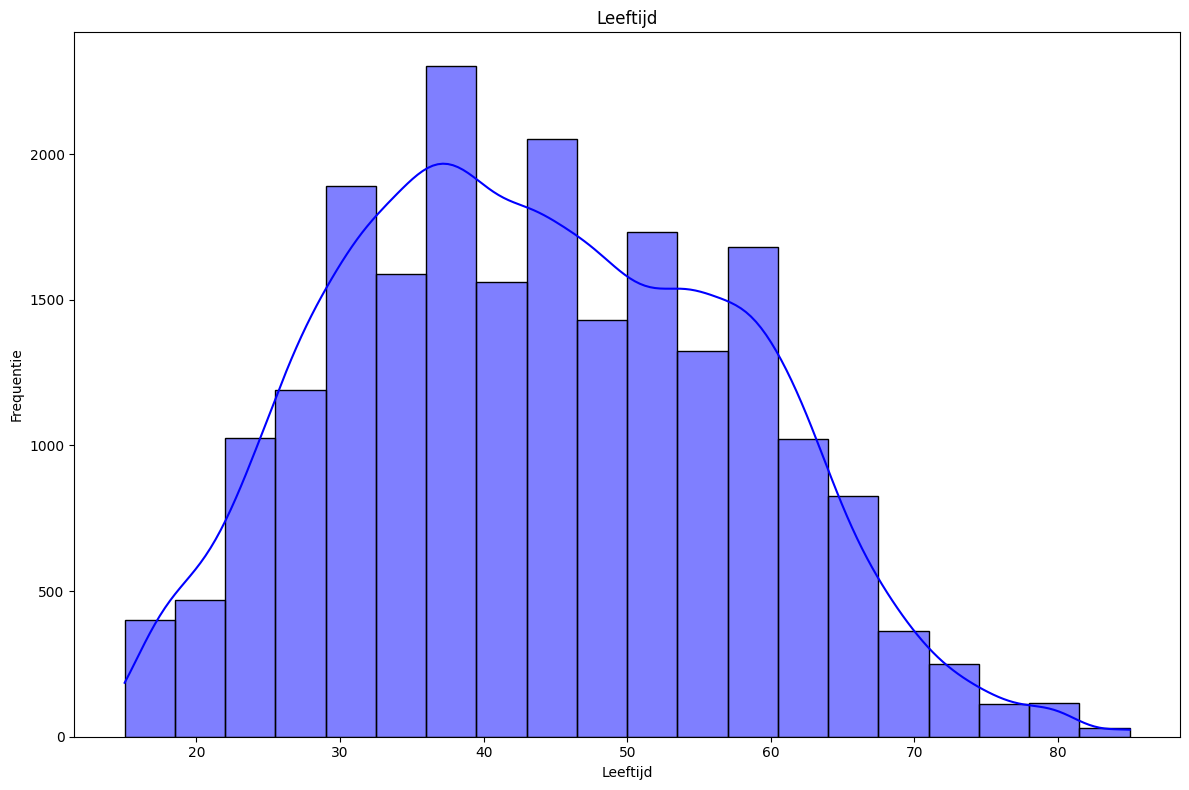

In [52]:
plt.figure(figsize=(12, 8))
sns.histplot(asum1['TEAGE'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()

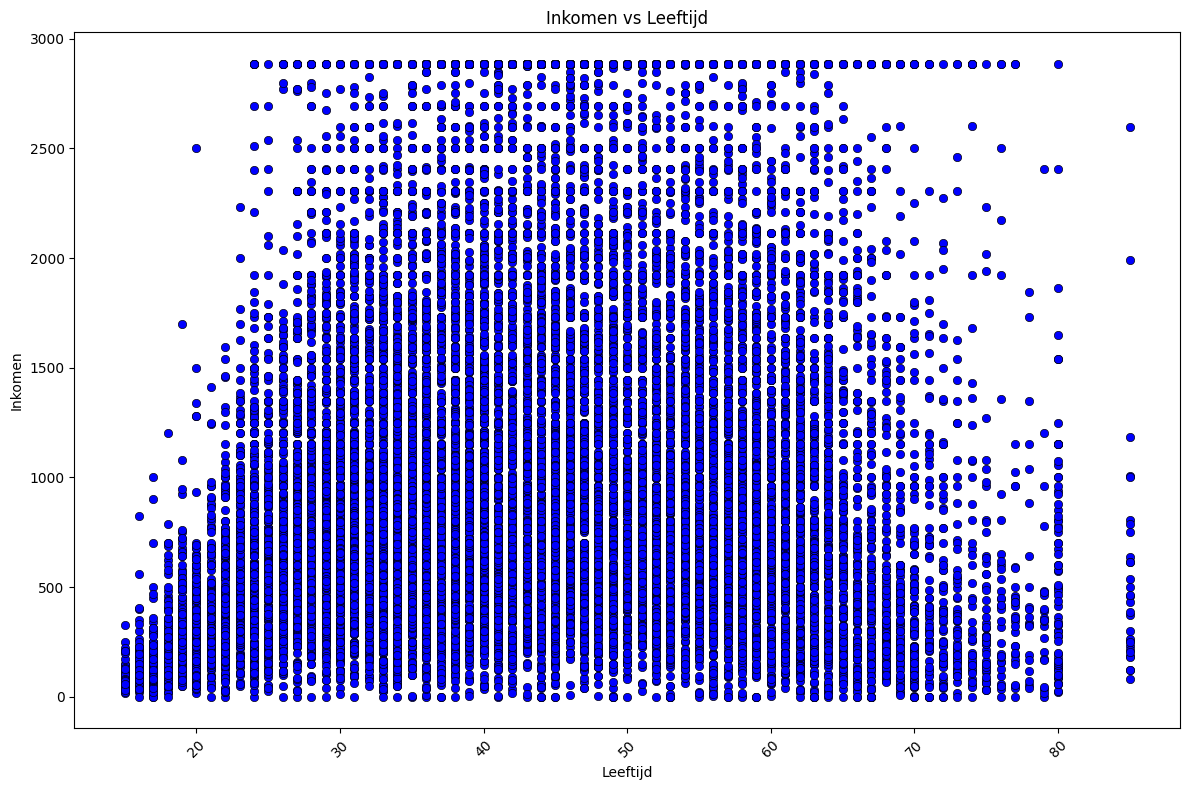

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TEAGE', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Inkomen')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

In [55]:
correlation, p_value = pearsonr(asum1['TEAGE'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen leeftijd en inkomen.")
else:
    print("Er is geen statistisch significant verband tussen leeftijd en inkomen.")

Pearson correlatiecoëfficiënt: 0.104685
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen leeftijd en inkomen.


## Eten en drinken

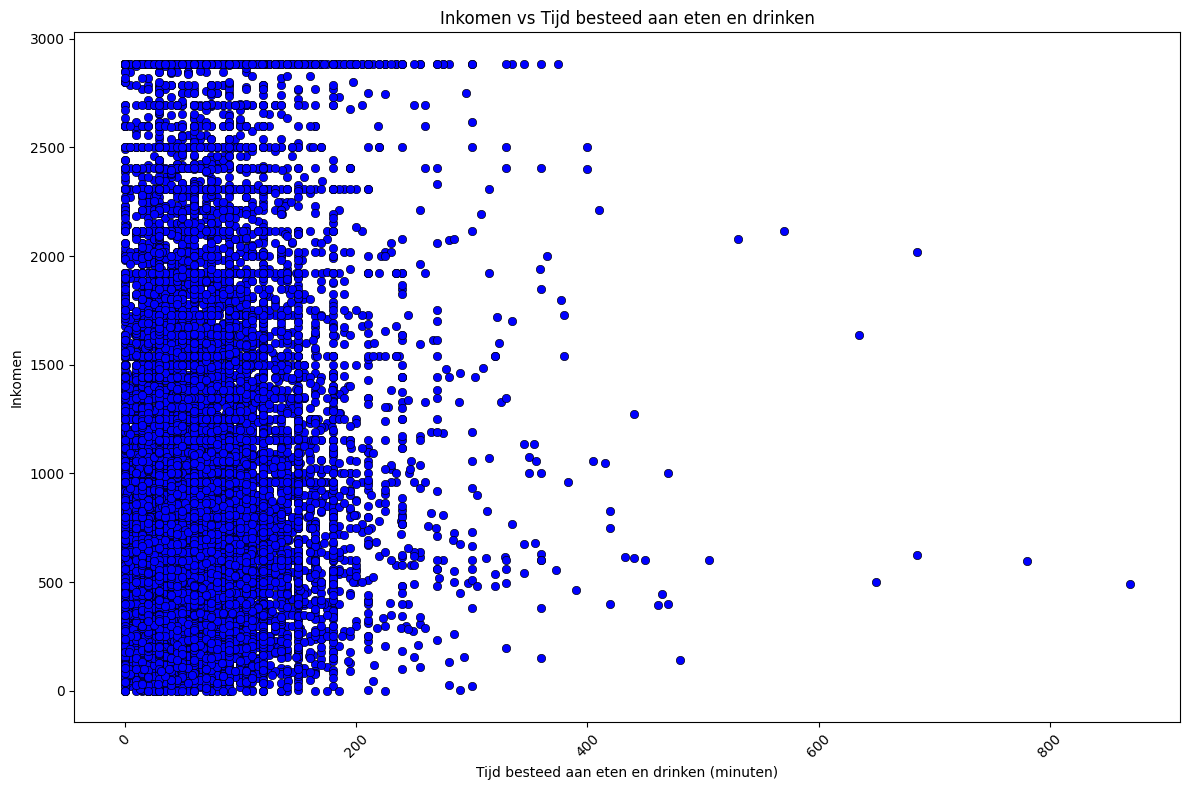

In [135]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t110101', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan eten en drinken')
plt.xlabel('Tijd besteed aan eten en drinken (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  # Zorg ervoor dat de ticks schuin staan

plt.tight_layout()
plt.show()

In [137]:
correlation, p_value = pearsonr(asum1['t110101'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan eten en drinken en inkomen.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan eten en drinken en inkomen.")

Pearson correlatiecoëfficiënt: 0.111125
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan eten en drinken en inkomen.


## Persoonlijke zorg

Pearson correlatiecoëfficiënt: -0.135128
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan persoonlijke zorg.


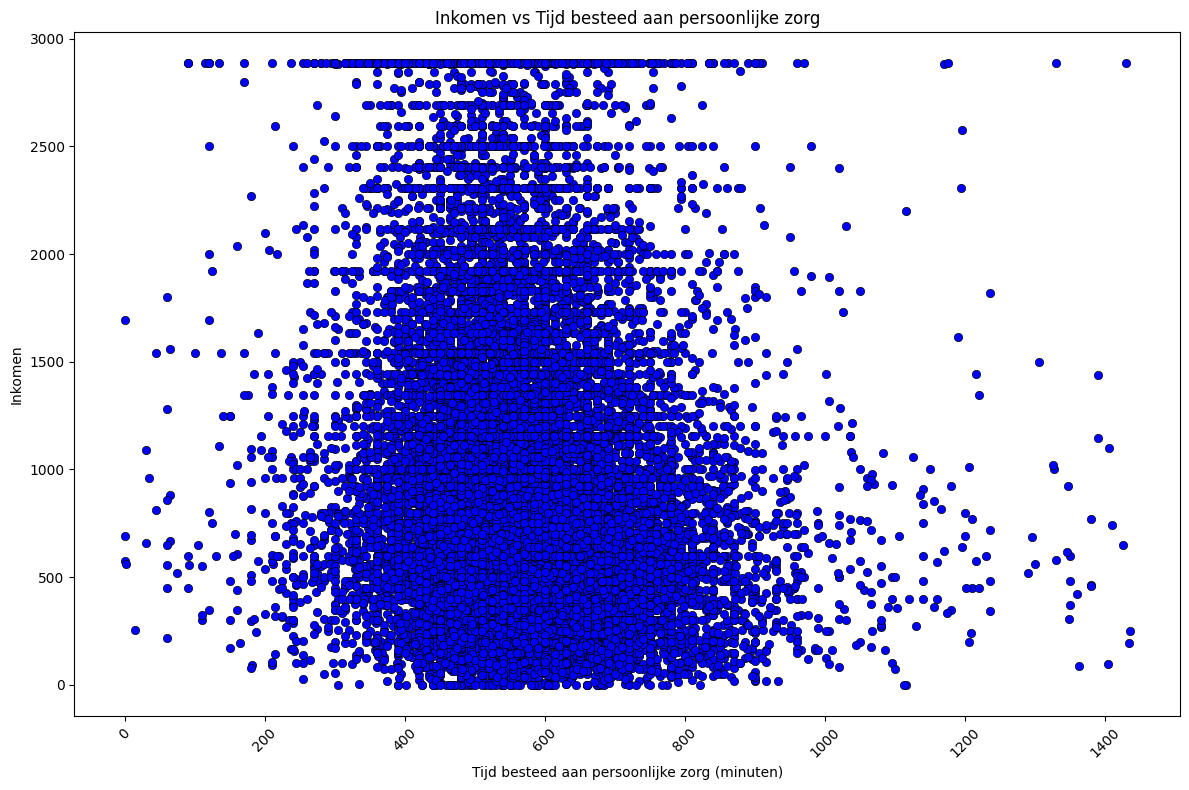

In [21]:
correlation, p_value = pearsonr(asum1['t01_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan persoonlijke zorg.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan persoonlijke zorg.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t01_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan persoonlijke zorg')
plt.xlabel('Tijd besteed aan persoonlijke zorg (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Slapen

Pearson correlatiecoëfficiënt: -0.117321
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan slapen.


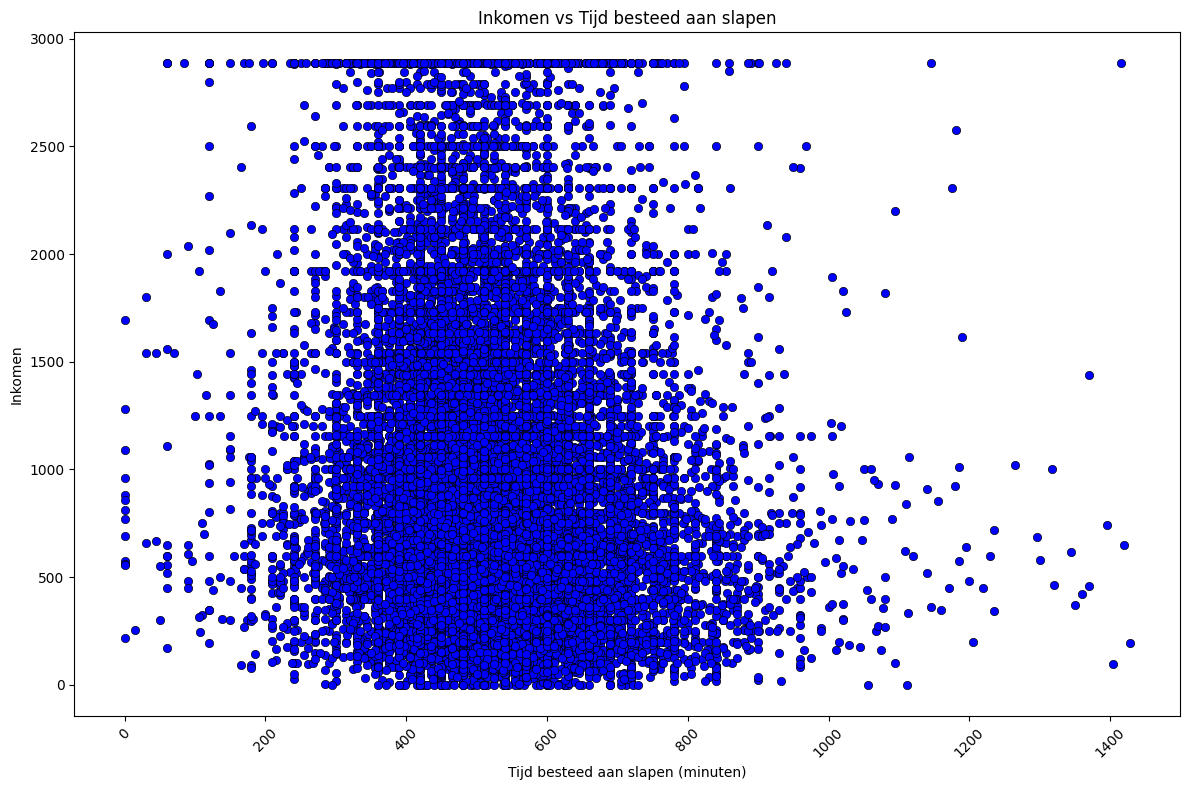

In [22]:
correlation, p_value = pearsonr(asum1['t0101_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan slapen.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan slapen.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t0101_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan slapen')
plt.xlabel('Tijd besteed aan slapen (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Eten en drinken

Pearson correlatiecoëfficiënt: 0.111125
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan eten en drinken en inkomen.


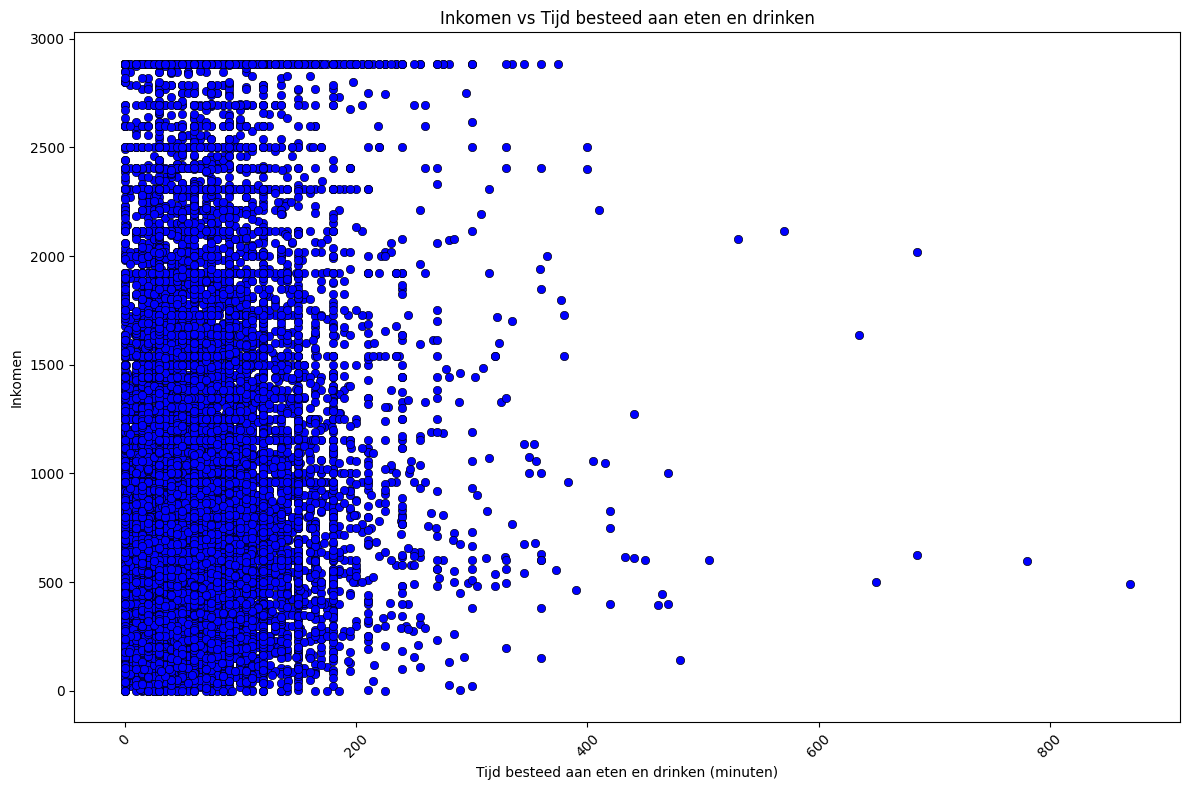

In [23]:
correlation, p_value = pearsonr(asum1['t1101_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan eten en drinken en inkomen.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan eten en drinken en inkomen.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t1101_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan eten en drinken')
plt.xlabel('Tijd besteed aan eten en drinken (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Onderwijs

Pearson correlatiecoëfficiënt: -0.106710
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan onderwijs.


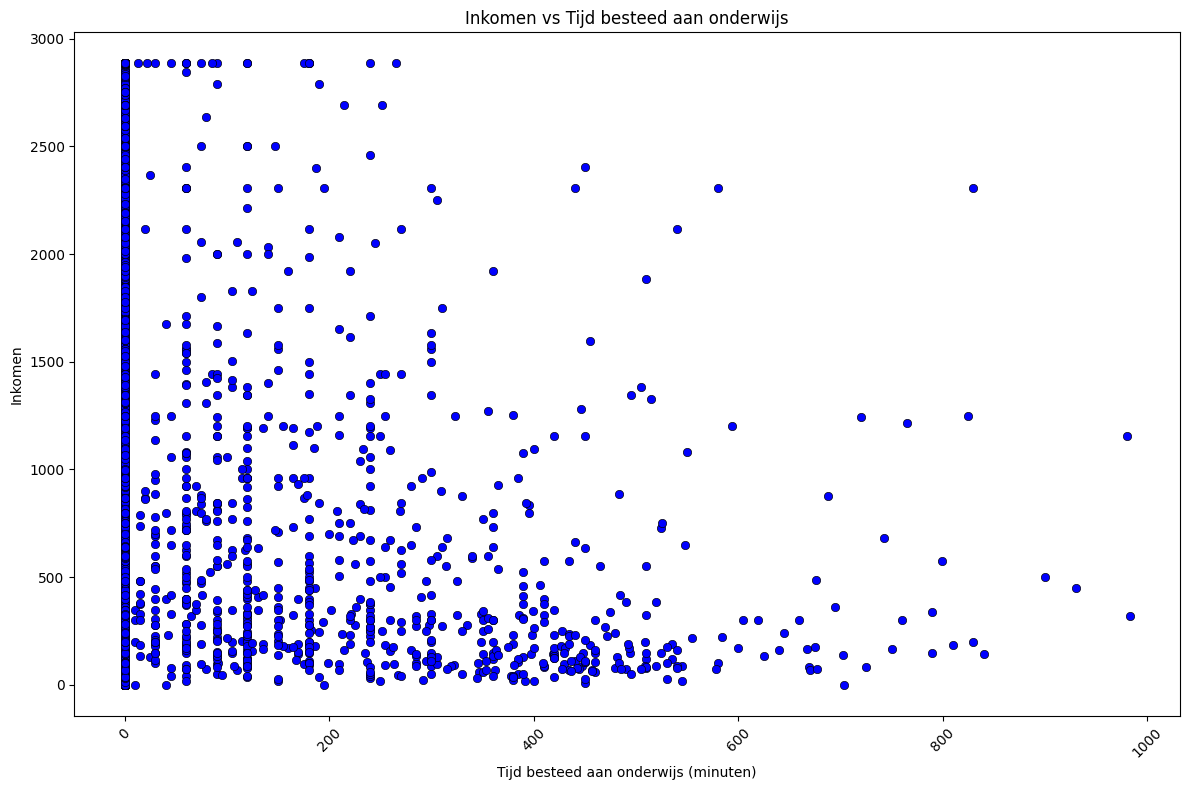

In [24]:
correlation, p_value = pearsonr(asum1['t06_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan onderwijs.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan onderwijs.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t06_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan onderwijs')
plt.xlabel('Tijd besteed aan onderwijs (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Hoofdwerkactiviteit

Pearson correlatiecoëfficiënt: 0.099330
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan de hoofdwerkactiviteit.


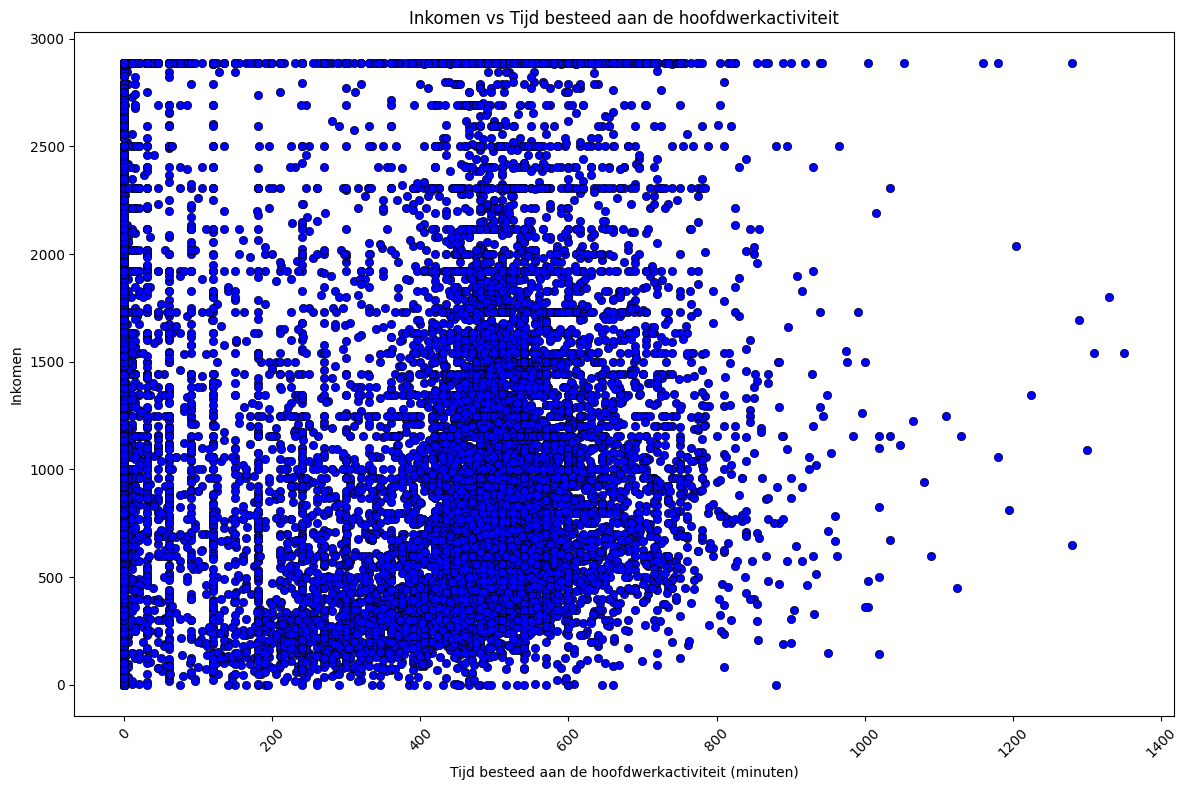

In [25]:
correlation, p_value = pearsonr(asum1['t050101'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan de hoofdwerkactiviteit.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan de hoofdwerkactiviteit.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t050101', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan de hoofdwerkactiviteit')
plt.xlabel('Tijd besteed aan de hoofdwerkactiviteit (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Ontspanning en vrije tijd

Pearson correlatiecoëfficiënt: -0.097852
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan ontspanning en vrije tijd.


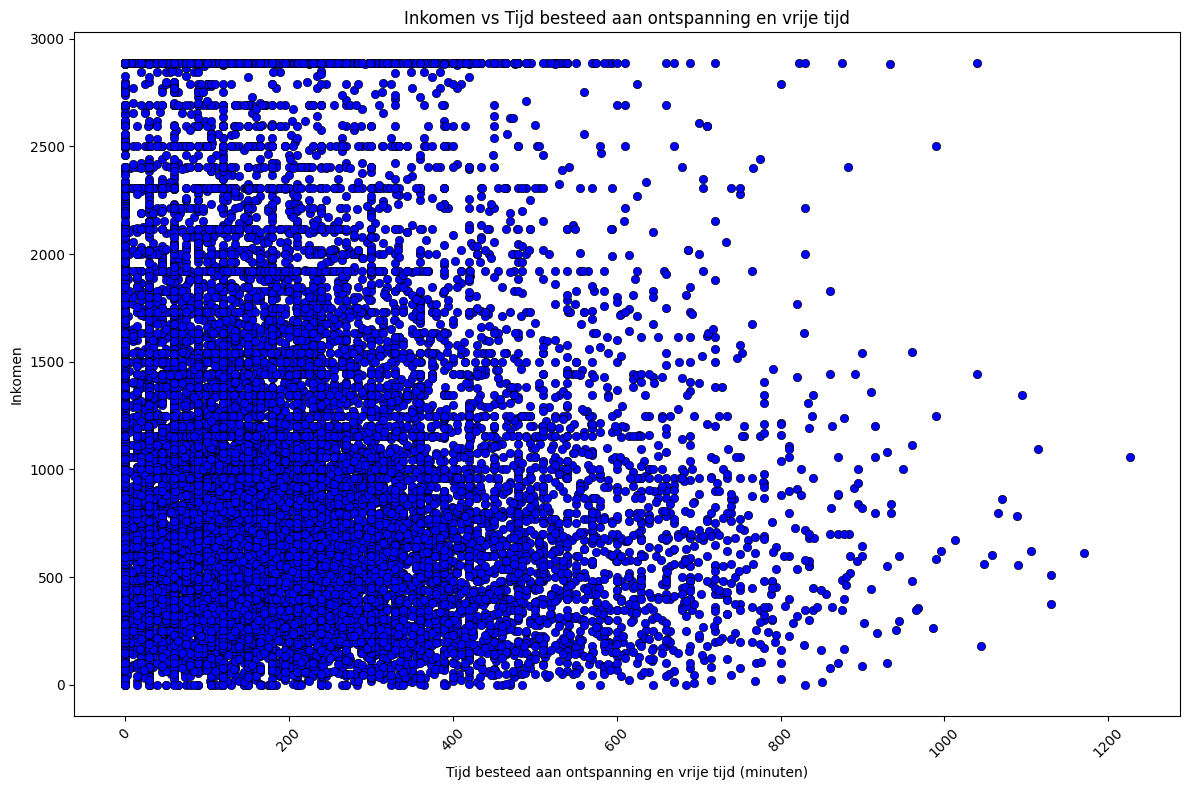

In [26]:
correlation, p_value = pearsonr(asum1['t1203_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan ontspanning en vrije tijd.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan ontspanning en vrije tijd.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t1203_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan ontspanning en vrije tijd')
plt.xlabel('Tijd besteed aan ontspanning en vrije tijd (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Reizen

Pearson correlatiecoëfficiënt: 0.091243
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan reizen.


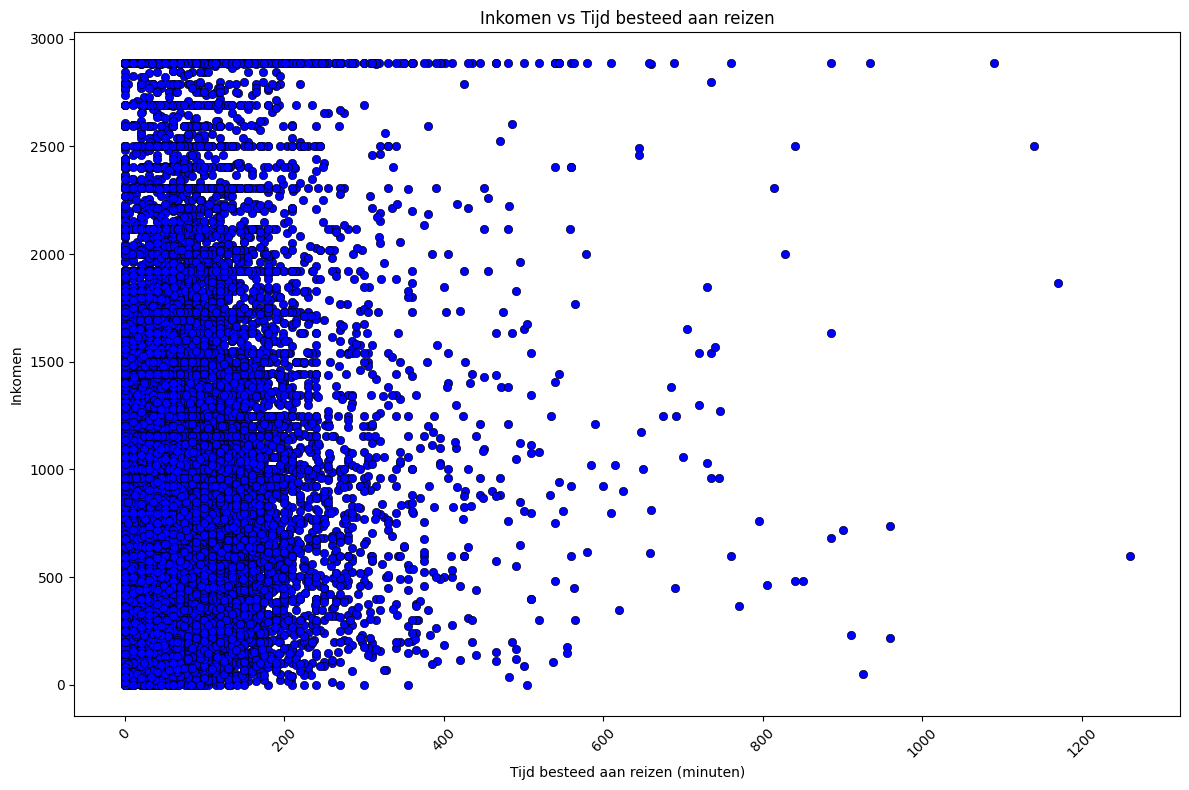

In [27]:
correlation, p_value = pearsonr(asum1['t18_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan reizen.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan reizen.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t18_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan reizen')
plt.xlabel('Tijd besteed aan reizen (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Sociale, ontspannings- en recreatieve activiteiten

Pearson correlatiecoëfficiënt: -0.089390
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan sociale, ontspannings- en recreatieve activiteiten.


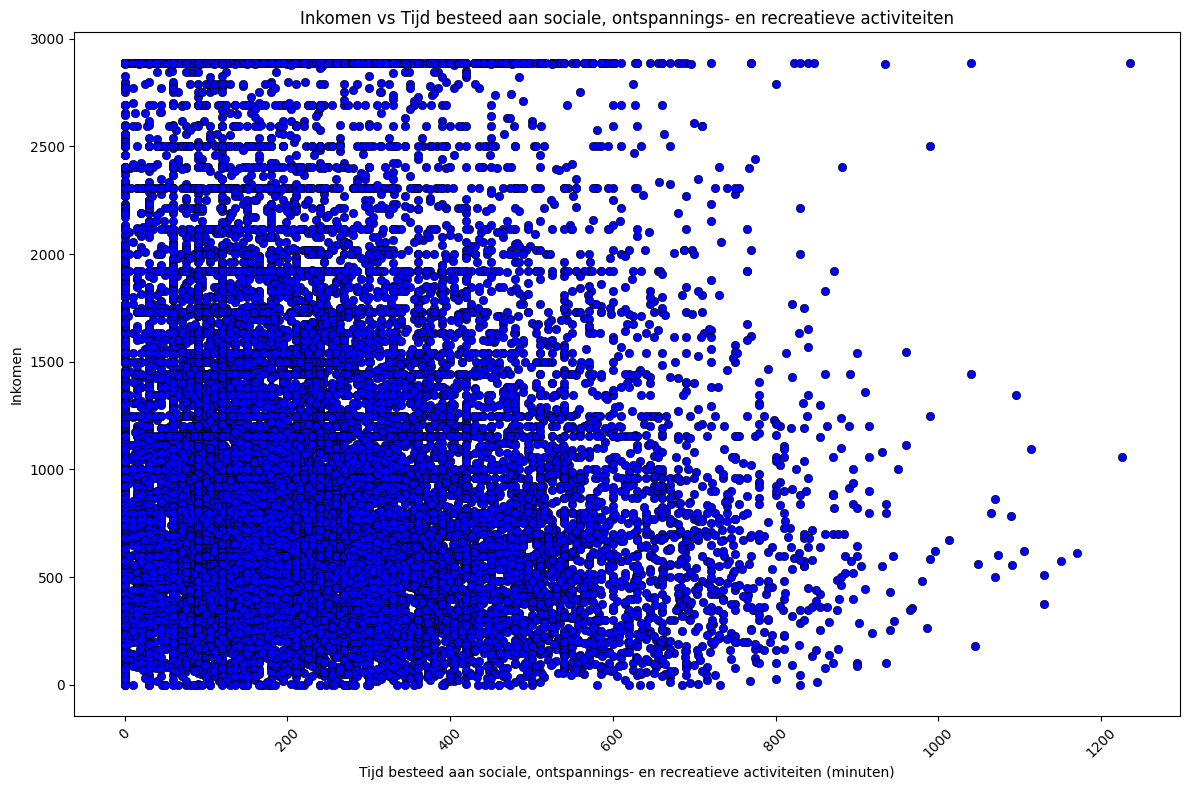

In [28]:
correlation, p_value = pearsonr(asum1['t12_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan sociale, ontspannings- en recreatieve activiteiten.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan sociale, ontspannings- en recreatieve activiteiten.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t12_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan sociale, ontspannings- en recreatieve activiteiten')
plt.xlabel('Tijd besteed aan sociale, ontspannings- en recreatieve activiteiten (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

## Sport, oefening en recreatie

Pearson correlatiecoëfficiënt: 0.078085
P-waarde: 0.000000
P-waarde: <0.001
Er is een statistisch significant verband tussen tijd besteed aan sport, oefening en recreatie.


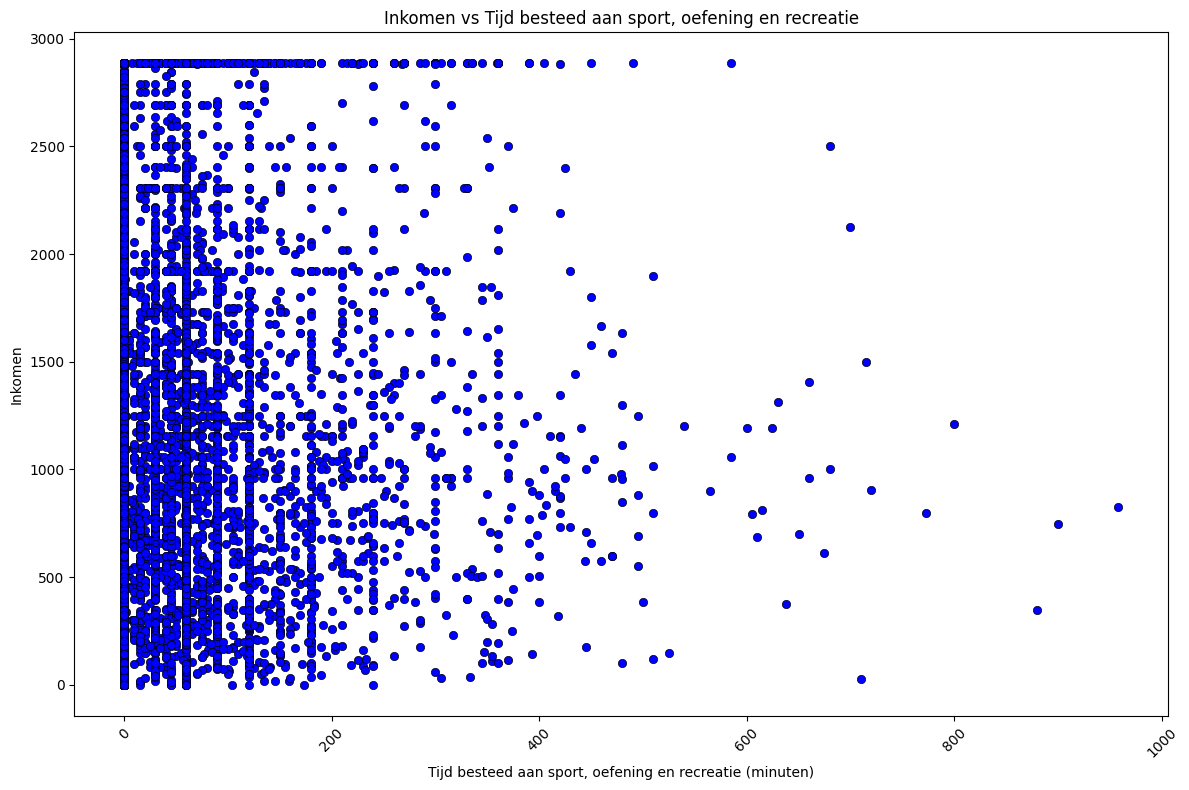

In [29]:
correlation, p_value = pearsonr(asum1['t13_sum'], asum1['TRERNWA'])
print(f'Pearson correlatiecoëfficiënt: {correlation:.6f}')
print(f'P-waarde: {p_value:.6f}')

if p_value < 0.001:
    print('P-waarde: <0.001')
elif p_value < 0.01:
    print('P-waarde: <0.01')
elif p_value < 0.05:
    print('P-waarde: <0.05')
elif p_value < 0.1:
    print('P-waarde: <0.1')
else:
    print(f'P-waarde: {p_value:.6f}')

if p_value < 0.05:
    print("Er is een statistisch significant verband tussen tijd besteed aan sport, oefening en recreatie.")
else:
    print("Er is geen statistisch significant verband tussen tijd besteed aan sport, oefening en recreatie.")
    
plt.figure(figsize=(12, 8))
sns.scatterplot(x='t13_sum', y='TRERNWA', data=asum1, color='blue', edgecolor='black')
plt.title('Inkomen vs Tijd besteed aan sport, oefening en recreatie')
plt.xlabel('Tijd besteed aan sport, oefening en recreatie (minuten)')
plt.ylabel('Inkomen')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()